In [2]:
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Target ID: 8191672, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

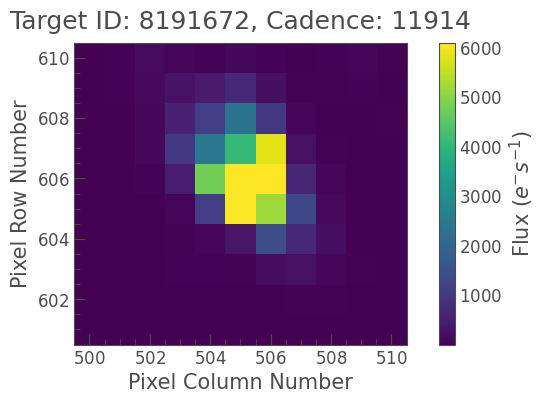

In [3]:
#getting the pixel file
kepId = "KIC 8191672"
Quarter = 4
pixelFile = lk.search_targetpixelfile(kepId,author="Kepler",cadence="long",quarter=Quarter).download()
pixelFile.plot()

Orbital Period is 3.549 d


<ipython-input-4-7b2a14c812c0>:10: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc = lc.bin(binsize=10)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

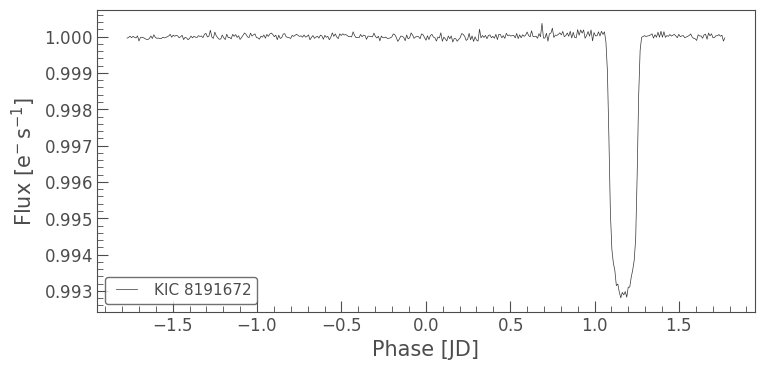

In [4]:
#converting the pixelFile into lightcurve
lc = pixelFile.to_lightcurve(aperture_mask = pixelFile.pipeline_mask)
lc = lc.flatten()
#getting the orbital period using periodogram
pdgram = lc.to_periodogram(method="bls")
orbital_period = pdgram.period_at_max_power
print("Orbital Period is {:.3f}".format(orbital_period))
lc = lc.fold(period=orbital_period)
lc = lc.remove_nans()
lc = lc.bin(binsize=10)
lc.plot()

In [5]:
  lc.meta

{'APERTURE_MASK': array([[False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False,  True,  True, False,
         False, False],
        [False, False, False, False,  True,  True,  True,  True, False,
         False, False],
        [False, False, False, False,  True,  True,  True, False, False,
         False, False],
        [False, False, False, False,  True,  True,  True, False, False,
         False, False],
        [False, False, False, False, False,  True,  True, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False]]),
 'TARGETID': 8191672,